Digits Classification using multilayer perception and keras 

uint8
(60000, 28, 28)
(10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18

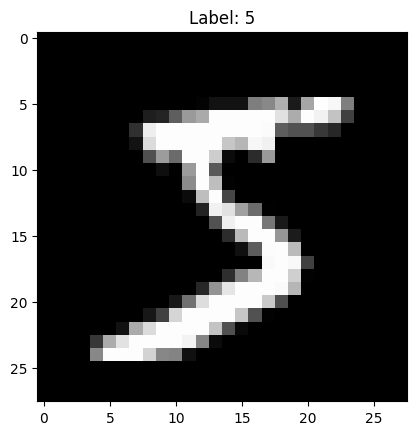

Before : label is : 5
After : label is : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9087 - loss: 0.3287 - val_accuracy: 0.9455 - val_loss: 0.1845
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9561 - loss: 0.1533 - val_accuracy: 0.9559 - val_loss: 0.1459
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9686 - loss: 0.1074 - val_accuracy: 0.9645 - val_loss: 0.1173
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9766 - loss: 0.0809 - val_accuracy: 0.9689 - val_loss: 0.1031
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9815 - loss: 0.0651 - val_accuracy: 0.9710 - val_loss: 0.0923
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9853 - loss: 0.0516 - val_accuracy: 0.9730 - val_loss: 0.0909
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9876 - loss: 0.0421 - val_accuracy: 0.9728 - val_loss: 0.0898
Epoch 8/10
750/750 ━━━━━━━━━━━━

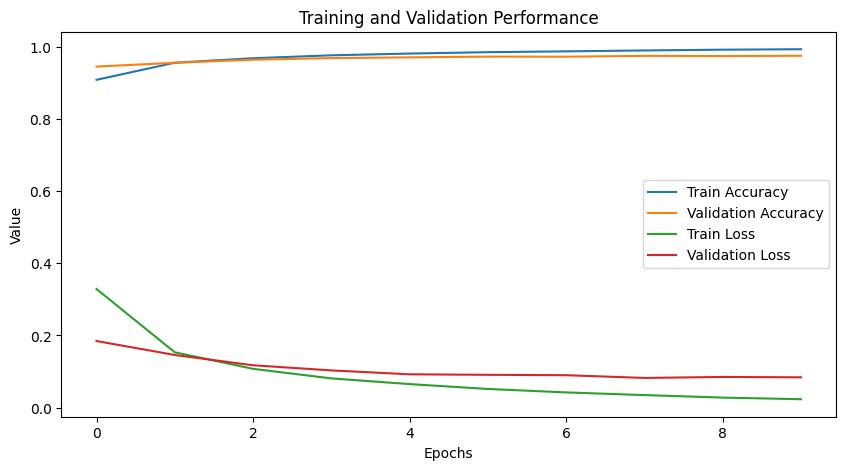

In [ ]:
#imports
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.dtype)
print(x_train.shape)
print(y_test.shape)
print(x_train[0])
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

# Normalize
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# to_categorical (one-hot encoding)
print(f"Before : label is : {y_train[0]}")
y_train = to_categorical(y_train)
print(f"After : label is : {y_train[0]}")
y_test = to_categorical(y_test)

# Build model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
result = model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2)

# Evaluate
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss : {loss}")
print(f"Test accuracy : {accuracy}")

# Print history info
print(result.history.keys())
print(result.history.values())
print(result.history)

# Visualization
plt.figure(figsize=(10,5))
plt.plot(result.history['accuracy'], label="Train Accuracy")
plt.plot(result.history['val_accuracy'], label="Validation Accuracy")
plt.plot(result.history['loss'], label="Train Loss")
plt.plot(result.history['val_loss'], label="Validation Loss")
plt.title("Training and Validation Performance")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()
